# import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

# Data

In [2]:
#개인이 갖고 있는 파일 불러와주세요!
amazon = pd.read_csv('./AmazonFoodCategory Dataset.csv')

-데이터전처리

In [3]:
amazon = amazon[amazon['Discount Amount'] >=0]
amazon = amazon[amazon['Sales Price'] > 0]
amazon = amazon[amazon['Sales Quantity'] > 0]
amazon.drop(['Line Number','Sales Rep','Invoice Date', 'Order Number','Item Number', 'Item Class', 'Promised Delivery Date'], axis = 1, inplace = True)
amazon = amazon[amazon['Sales Cost Amount'] > 0]
amazon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64223 entries, 0 to 65279
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Custkey                           64223 non-null  int64  
 1   DateKey                           64223 non-null  object 
 2   Discount Amount                   64223 non-null  float64
 3   Invoice Number                    64223 non-null  int64  
 4   Item                              64223 non-null  object 
 5   List Price                        64223 non-null  float64
 6   Sales Amount                      64223 non-null  float64
 7   Sales Amount Based on List Price  64223 non-null  float64
 8   Sales Cost Amount                 64223 non-null  float64
 9   Sales Margin Amount               64223 non-null  float64
 10  Sales Price                       64223 non-null  float64
 11  Sales Quantity                    64223 non-null  int64  
 12  U/M      

In [4]:
# 날짜 필터링 

start_date= '2017-01-01'
end_date= '2018-03-21'

amazon['DateKey'] = pd.to_datetime(amazon['DateKey'], format= '%m/%d/%Y')
amazon = amazon[(amazon['DateKey'] >=start_date) & (amazon['DateKey'] <= end_date)]
# sorted(amazon['DateKey'].unique())

amazon.info()
amazon.head(3)


<class 'pandas.core.frame.DataFrame'>
Index: 36307 entries, 28021 to 65279
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Custkey                           36307 non-null  int64         
 1   DateKey                           36307 non-null  datetime64[ns]
 2   Discount Amount                   36307 non-null  float64       
 3   Invoice Number                    36307 non-null  int64         
 4   Item                              36307 non-null  object        
 5   List Price                        36307 non-null  float64       
 6   Sales Amount                      36307 non-null  float64       
 7   Sales Amount Based on List Price  36307 non-null  float64       
 8   Sales Cost Amount                 36307 non-null  float64       
 9   Sales Margin Amount               36307 non-null  float64       
 10  Sales Price                       36307 non-nul

,Custkey,DateKey,Discount Amount,Invoice Number,Item,List Price,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,U/M
28021,10008602,2018-03-21,439.2400,226437,Tell Tale Summer Squash,195.0000,535.76,975.0000,372.26,163.50,107.152000,5,EA
28022,10008602,2018-03-21,1517.3076,226437,Nationeel Avocado Dip,842.0244,1850.79,3368.0976,1256.20,594.59,462.697500,4,EA
28023,10014779,2018-03-21,192.4900,226451,Super White Sugar,157.7600,280.79,473.2800,143.73,137.06,93.596667,3,SE


In [5]:
temp= amazon['Custkey'].value_counts()
print(len(temp[temp > 1]))
# 34292 개의 Custkey 데이터 중에 중복구매한 사용자 수 482
print(len(temp[temp==1]))
# 1인 사람 41개
print(len(temp))

487
42
529


In [6]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36307 entries, 28021 to 65279
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Custkey                           36307 non-null  int64         
 1   DateKey                           36307 non-null  datetime64[ns]
 2   Discount Amount                   36307 non-null  float64       
 3   Invoice Number                    36307 non-null  int64         
 4   Item                              36307 non-null  object        
 5   List Price                        36307 non-null  float64       
 6   Sales Amount                      36307 non-null  float64       
 7   Sales Amount Based on List Price  36307 non-null  float64       
 8   Sales Cost Amount                 36307 non-null  float64       
 9   Sales Margin Amount               36307 non-null  float64       
 10  Sales Price                       36307 non-nul

In [7]:
print('총 매출: ', round(amazon['Sales Amount'].sum(), 2))
print('총 할인 금액: ', round(amazon['Discount Amount'].sum(), 2))

총 매출:  96803974.11
총 할인 금액:  69436945.25


# 고객별 Sales Amount

In [8]:
cust_m= amazon.groupby('Custkey')['Sales Amount'].sum().reset_index()

cust_m.sort_values(by= 'Sales Amount', ascending= False)

,Custkey,Sales Amount
343,10021485,10949474.37
432,10025024,7951267.71
443,10025052,5419724.38
440,10025039,3259962.46
489,10025919,3250786.04
...,...,...
491,10026009,224.55
272,10019812,221.04
427,10024924,216.33
169,10013039,216.20


In [9]:
# R, F

cust_rf = amazon.groupby('Custkey').agg(
    Last_Purchase=('DateKey', 'max')
    , Frequency=('Invoice Number', 'count') 
).reset_index()

cust_rf

,Custkey,Last_Purchase,Frequency
0,10000453,2017-01-06,10
1,10000455,2017-11-04,19
2,10000456,2017-12-04,23
3,10000457,2017-12-01,3
4,10000458,2018-03-06,4
...,...,...,...
524,10027381,2018-03-14,108
525,10027560,2017-12-26,42
526,10027572,2018-03-20,45
527,10027575,2018-03-06,5


# RFM 523개

In [10]:
cust_rfm= cust_rf.merge(cust_m, on= 'Custkey')

cust_rfm= cust_rfm.rename(columns= {'Last_Purchase': 'Recency',
                          'Sales Amount': 'Monetary'})

In [11]:
cust_rfm.info()
cust_rfm.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Custkey    529 non-null    int64         
 1   Recency    529 non-null    datetime64[ns]
 2   Frequency  529 non-null    int64         
 3   Monetary   529 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 16.7 KB


,Custkey,Recency,Frequency,Monetary
0,10000453,2017-01-06,10,8422.15
1,10000455,2017-11-04,19,22403.73
2,10000456,2017-12-04,23,104994.68


In [12]:
# recency datetime으로 변환
cust_rfm['Recency']= pd.to_datetime(cust_rfm['Recency'])

# 2018 03 22을 현재날짜로 설정, 가장 최근의 주문 일자를 뺌
cust_rfm['Recency']= dt.datetime(2018, 3, 22) - cust_rfm['Recency']
# 01로 하니까 오류남

# +1
cust_rfm['Recency']= cust_rfm['Recency'].apply(lambda x:x.days+1)
#Recency도 값이 큰게 좋은 걸로 변경하기 위해 역수 취해줌
cust_rfm['Recency']= 1/cust_rfm['Recency']
 
cust_rfm

,Custkey,Recency,Frequency,Monetary
0,10000453,0.002268,10,8422.15
1,10000455,0.007194,19,22403.73
2,10000456,0.009174,23,104994.68
3,10000457,0.008929,3,14284.80
4,10000458,0.058824,4,4994.49
...,...,...,...,...
524,10027381,0.111111,108,70994.97
525,10027560,0.011494,42,48482.74
526,10027572,0.333333,45,46290.99
527,10027575,0.058824,5,3548.62


In [13]:
cust_rfm['Monetary'] = cust_rfm['Monetary'].astype(int)

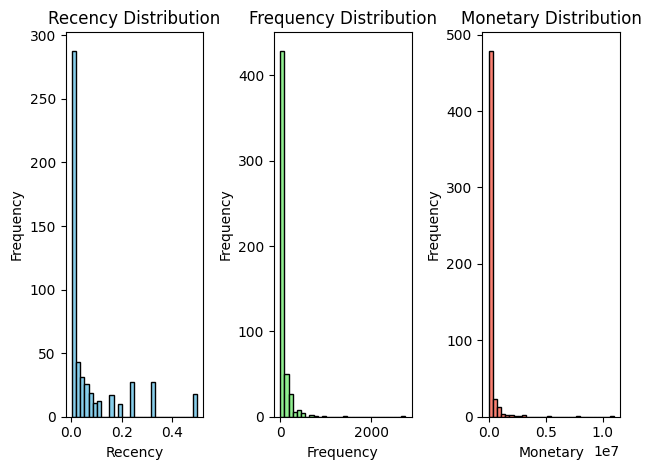

In [14]:
plt.subplot(1,3,1)
plt.hist(cust_rfm['Recency'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency Distribution')

plt.subplot(1,3,2)
plt.hist(cust_rfm['Frequency'], bins=30, color='lightgreen', edgecolor='black')
plt.xlabel('Frequency')
plt.ylabel('Frequency')
plt.title('Frequency Distribution')

plt.subplot(1,3,3)
plt.hist(cust_rfm['Monetary'], bins=30, color='salmon', edgecolor='black')
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

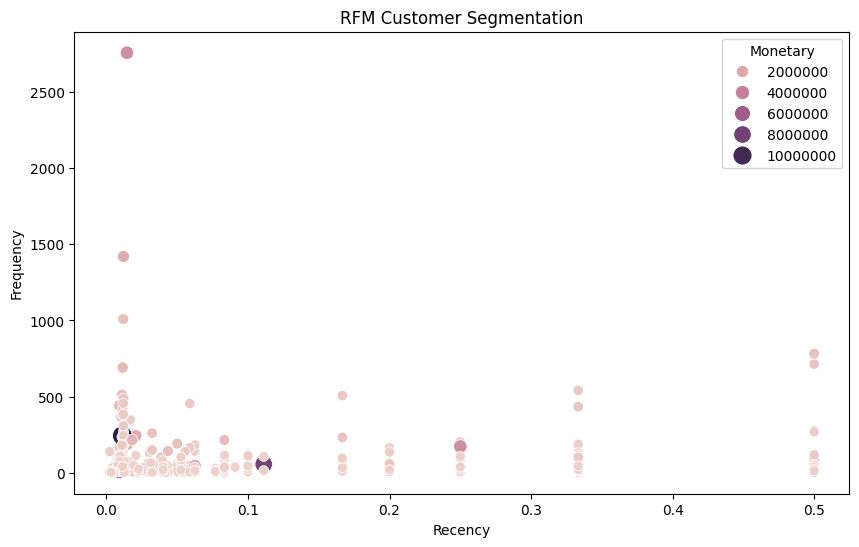

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Recency', y='Frequency', hue='Monetary', data=cust_rfm, size='Monetary', sizes=(50,200))
plt.title('RFM Customer Segmentation')
plt.show()

# 데이터 스케일링

In [16]:
cust_rfm_drop = cust_rfm.drop(columns='Custkey')

In [17]:
from sklearn.preprocessing import MinMaxScaler, PowerTransformer

In [18]:
rb = PowerTransformer(method='box-cox')
mm = MinMaxScaler()
amazon_rfm_rb = pd.DataFrame(rb.fit_transform(cust_rfm_drop), columns=cust_rfm_drop.columns)
amazon_scaled = pd.DataFrame(mm.fit_transform(amazon_rfm_rb), columns=cust_rfm_drop.columns)

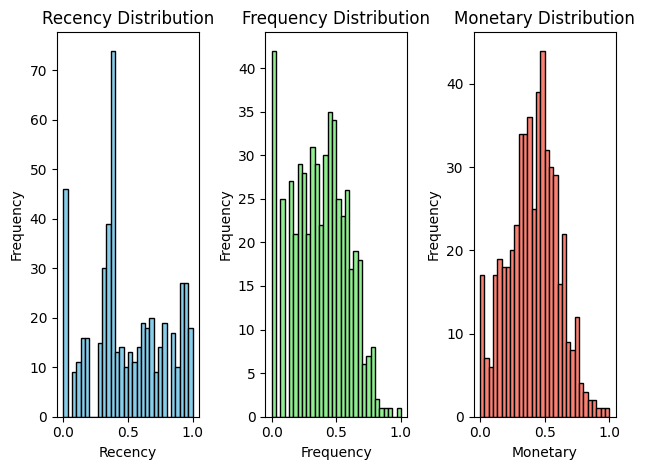

In [19]:
plt.subplot(1,3,1)
plt.hist(amazon_scaled['Recency'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency Distribution')

plt.subplot(1,3,2)
plt.hist(amazon_scaled['Frequency'], bins=30, color='lightgreen', edgecolor='black')
plt.xlabel('Frequency')
plt.ylabel('Frequency')
plt.title('Frequency Distribution')

plt.subplot(1,3,3)
plt.hist(amazon_scaled['Monetary'], bins=30, color='salmon', edgecolor='black')
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

# K-Means 클러스터링

In [20]:
#!pip install yellowbrick

In [21]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

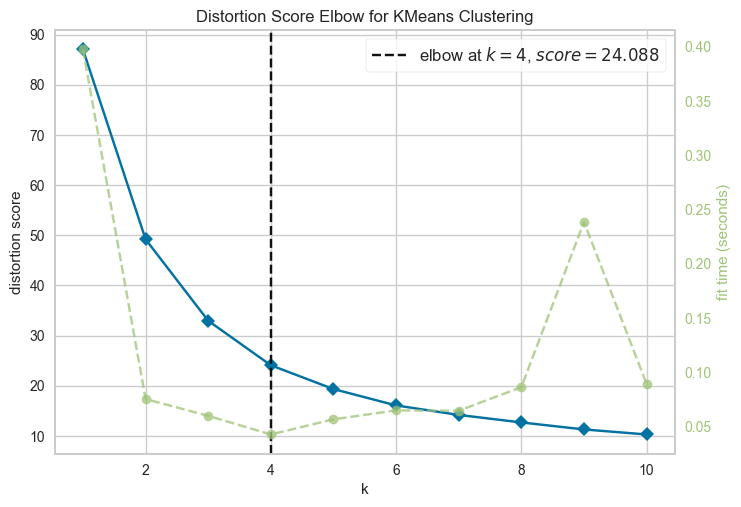

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
kmeans = KMeans(random_state=42)
elbow = KElbowVisualizer(kmeans, k=(1,11))
elbow.fit(amazon_scaled)
elbow.show()

-The KElbowVisualizer also displays the amount of time to train the clustering model per "K" as a dashed green line, but is can be hidden by setting (timings=False). 
-score: SSE(Sum of Square Errors)

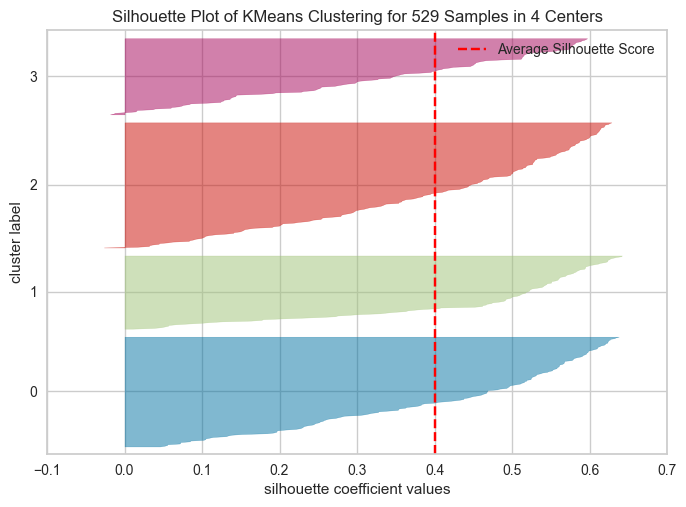

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 529 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [23]:
kmeans_4 = KMeans(4, random_state=42)
visualizer = SilhouetteVisualizer(kmeans_4, colors='yellowbrick')
visualizer.fit(amazon_scaled)
visualizer.show()

In [24]:
k=4
kmeans_4 = KMeans(4, random_state=4)
kmeans_4.fit(amazon_scaled)
cluster = kmeans_4.labels_

In [25]:
amazon_scaled['cluster']=cluster
amazon_kmeans =amazon_scaled.copy()
amazon_kmeans

,Recency,Frequency,Monetary,cluster
0,0.001731,0.294586,0.309493,1
1,0.275898,0.376125,0.396361,2
2,0.328705,0.400348,0.538056,2
3,0.322888,0.140959,0.356128,1
4,0.682906,0.177748,0.263980,3
...,...,...,...,...
524,0.786250,0.595621,0.501626,0
525,0.376242,0.476548,0.466470,2
526,0.946318,0.485265,0.462229,0
527,0.682906,0.206249,0.234539,3


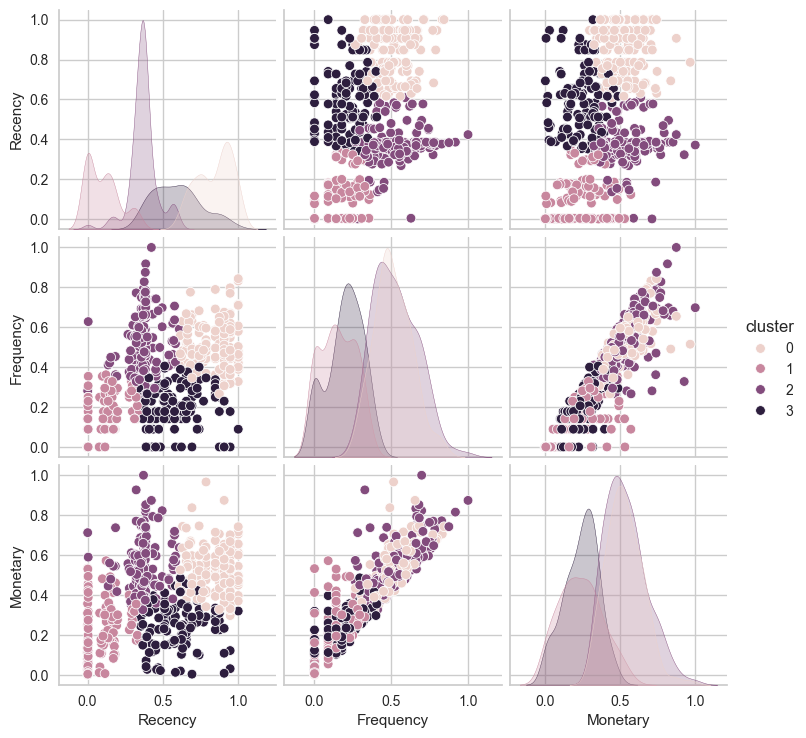

In [26]:
sns.pairplot(amazon_kmeans, hue='cluster')
plt.show()

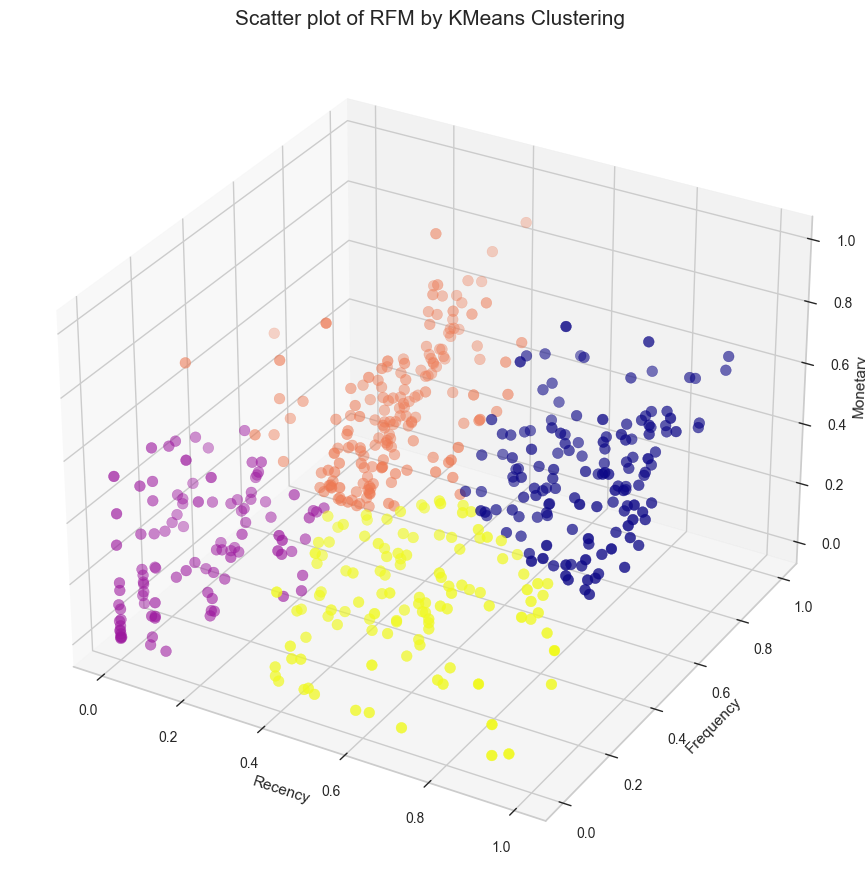

In [27]:
fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(amazon_kmeans['Recency'], amazon_kmeans['Frequency'], amazon_kmeans['Monetary'], c=amazon_kmeans['cluster'], s=60, depthshade= True, cmap='plasma')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('Scatter plot of RFM by KMeans Clustering', fontsize = 15)
plt.tight_layout()
plt.show()

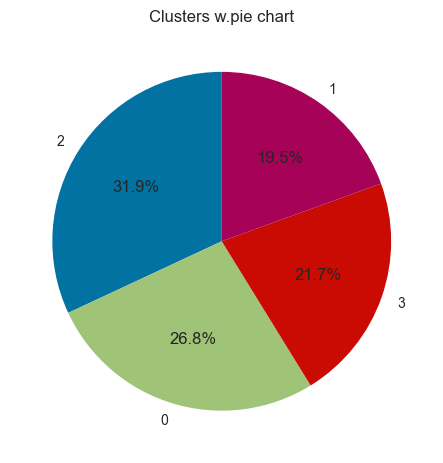

In [28]:
clusters = amazon_kmeans.cluster.value_counts()
plt.pie(clusters, labels=clusters.index, autopct='%.1f%%', startangle=90)
plt.title('Clusters w.pie chart')
plt.show()

####  R,F,M 가중치 구하기(1) - 변동계수 사용

In [29]:
#군집별 R,F,M의 평균과 표준편차 구하기 
cluster_mean = round(amazon_kmeans.groupby('cluster')[['Recency', 'Frequency', 'Monetary']].mean(),2)
cluster_std = round(amazon_kmeans.groupby('cluster')[['Recency', 'Frequency', 'Monetary']].std(),2)

In [30]:
cluster_mean

,Recency,Frequency,Monetary
cluster,,,
0,0.84,0.51,0.53
1,0.10,0.15,0.24
2,0.37,0.53,0.54
3,0.60,0.20,0.24


In [31]:
cluster_std

,Recency,Frequency,Monetary
cluster,,,
0,0.12,0.12,0.12
1,0.11,0.11,0.14
2,0.09,0.14,0.14
3,0.16,0.11,0.11


In [32]:
#변동계수(Coefficient of Variation)를 활용해 최적가중치 구하기

#Recency
cv_r0 = cluster_std.iloc[0,0]/cluster_mean.iloc[0,0]
cv_r1 = cluster_std.iloc[1,0]/cluster_mean.iloc[1,0]
cv_r2 = cluster_std.iloc[2,0]/cluster_mean.iloc[2,0]
cv_r3 = cluster_std.iloc[3,0]/cluster_mean.iloc[3,0]
#Recency의 가중평균 계산
w1 = min(cv_r0, cv_r1, cv_r2, cv_r3)/(cv_r0+cv_r1+cv_r2+cv_r3)

#Frequency
cv_f0 = cluster_std.iloc[0,1]/cluster_mean.iloc[0,1]
cv_f1 = cluster_std.iloc[1,1]/cluster_mean.iloc[1,1]
cv_f2 = cluster_std.iloc[2,1]/cluster_mean.iloc[2,1]
cv_f3 = cluster_std.iloc[3,1]/cluster_mean.iloc[3,1]
#Frequency의 가중평균 계산
w2 = min(cv_f0, cv_f1, cv_f2, cv_f3)/(cv_f0+cv_f1+cv_f2+cv_f3)

#Monetary
cv_m0 = cluster_std.iloc[0,2]/cluster_mean.iloc[0,2]
cv_m1 = cluster_std.iloc[1,2]/cluster_mean.iloc[1,2]
cv_m2 = cluster_std.iloc[2,2]/cluster_mean.iloc[2,2]
cv_m3 = cluster_std.iloc[3,2]/cluster_mean.iloc[3,2]
#Monetary의 가중평균 계산
w3 = min(cv_m0, cv_m1, cv_m2, cv_m3)/(cv_m0+cv_m1+cv_m2+cv_m3)

total_w = w1+w2+w3
w1 = round(w1/total_w, 3)
w2 = round(w2/total_w, 3)
w3 = round(w3/total_w, 3)

print(w1+w2+w3)
print(w1,w2,w3)



1.0
0.225 0.365 0.41


#### R,F,M 가중치 구하기(2) - feature importance 사용

In [33]:
#!pip install lightgbm


In [34]:
from lightgbm import LGBMClassifier

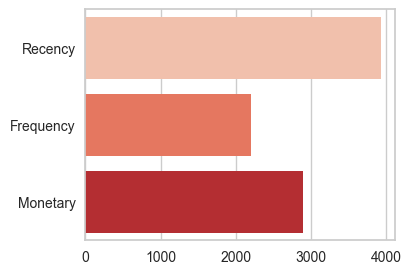

Recency: 0.43
Frequency: 0.24
Monetary: 0.32


In [35]:
X=amazon_scaled[['Recency', 'Frequency', 'Monetary']]
y=amazon_kmeans['cluster']


lgbm = LGBMClassifier(random_state=42, verbose=-1)
lgbm.fit(X,y)

plt.figure(figsize=(4,3))
sns.barplot(x=lgbm.feature_importances_, y=X.columns, palette='Reds')
plt.ylabel('')
plt.show()

#가중치 계산
scores = lgbm.feature_importances_/sum(lgbm.feature_importances_)
for i,c in enumerate(X.columns):
    print(f'{c}: {round(scores[i],2)}')

    # 기간이 길지 않으니까 f가 적을 수 있음. -- 적당한 논리와 가설이 있어야 함...
    # 논리 없으면 ... 파라미터 튜닝으로 접근.,... 카테고리별로 rfm 돌리기 
    # 실제 업계: frm 
    # countplot

# 가중치 부여 - feature importance 확인

In [36]:
amazon_kmeans['rfm_score'] = round((0.43*amazon_kmeans['Recency']) + (0.24*amazon_scaled['Frequency']) + (0.32*amazon_kmeans['Monetary']),4)*100

In [37]:
amazon_kmeans['rfm_score'].value_counts().sort_index(ascending=False)

rfm_score
86.99    1
85.53    1
82.67    1
81.62    2
79.82    1
        ..
0.60     1
0.33     1
0.32     1
0.17     1
0.07     1
Name: count, Length: 504, dtype: int64

In [38]:
amazon_kmeans

,Recency,Frequency,Monetary,cluster,rfm_score
0,0.001731,0.294586,0.309493,1,17.05
1,0.275898,0.376125,0.396361,2,33.57
2,0.328705,0.400348,0.538056,2,40.96
3,0.322888,0.140959,0.356128,1,28.66
4,0.682906,0.177748,0.263980,3,42.08
...,...,...,...,...,...
524,0.786250,0.595621,0.501626,0,64.16
525,0.376242,0.476548,0.466470,2,42.54
526,0.946318,0.485265,0.462229,0,67.13
527,0.682906,0.206249,0.234539,3,41.82


# 고객 등급 분류

diamond-platinum-gold-silver-family 순으로 높음

In [39]:
def customer_segmentation(row):
    if row['rfm_score'] <=40:
        return 'family'
    elif row['rfm_score'] <=60:
        return 'silver'
    elif row['rfm_score'] <=70:
        return 'gold'
    elif row['rfm_score'] <=80:
        return 'platinum'
    else:
        return 'diamond'
    
amazon_kmeans['Grade'] = amazon_kmeans.apply(customer_segmentation, axis=1)
amazon_kmeans

,Recency,Frequency,Monetary,cluster,rfm_score,Grade
0,0.001731,0.294586,0.309493,1,17.05,family
1,0.275898,0.376125,0.396361,2,33.57,family
2,0.328705,0.400348,0.538056,2,40.96,silver
3,0.322888,0.140959,0.356128,1,28.66,family
4,0.682906,0.177748,0.263980,3,42.08,silver
...,...,...,...,...,...,...
524,0.786250,0.595621,0.501626,0,64.16,gold
525,0.376242,0.476548,0.466470,2,42.54,silver
526,0.946318,0.485265,0.462229,0,67.13,gold
527,0.682906,0.206249,0.234539,3,41.82,silver


In [40]:
amazon_kmeans['Grade'].value_counts()

Grade
family      222
silver      201
gold         68
platinum     33
diamond       5
Name: count, dtype: int64

In [41]:
round(amazon_kmeans['Grade'].value_counts(normalize=True),3)*100

Grade
family      42.0
silver      38.0
gold        12.9
platinum     6.2
diamond      0.9
Name: proportion, dtype: float64

# 컬럼 이어주기 

In [56]:
amazon_rfm_cluster = pd.concat([cust_rfm, amazon_kmeans], axis=1)
amazon_rfm_cluster
amazon_rfm_cluster.columns=['Custkey', 'Recency', 'Frequency', 'Monetary', 'Recency_sc', 'Frequency_sc','Monetary_sc','cluster', 'rfm_score', 'Grade']
amazon_rfm_cluster
amazon_merged = pd.merge(amazon, amazon_rfm_cluster, on='Custkey')
amazon_merged

,Custkey,DateKey,Discount Amount,Invoice Number,Item,List Price,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,...,U/M,Recency,Frequency,Monetary,Recency_sc,Frequency_sc,Monetary_sc,cluster,rfm_score,Grade
0,10008602,2018-03-21,439.2400,226437,Tell Tale Summer Squash,195.0000,535.76,975.0000,372.26,163.50,...,EA,0.500000,27,70012,1.0,0.420659,0.500336,0,69.11,gold
1,10008602,2018-03-21,1517.3076,226437,Nationeel Avocado Dip,842.0244,1850.79,3368.0976,1256.20,594.59,...,EA,0.500000,27,70012,1.0,0.420659,0.500336,0,69.11,gold
2,10008602,2018-02-21,193.1000,224048,Tell Tale Green Pepper,214.3200,235.54,428.6400,111.10,124.44,...,EA,0.500000,27,70012,1.0,0.420659,0.500336,0,69.11,gold
3,10008602,2018-02-21,613.5000,224048,Good Chardonnay Wine,121.3400,599.90,1213.4000,360.17,239.73,...,EA,0.500000,27,70012,1.0,0.420659,0.500336,0,69.11,gold
4,10008602,2018-02-21,710.7000,224048,Ebony Fuji Apples,157.7600,866.90,1577.6000,477.45,389.45,...,SE,0.500000,27,70012,1.0,0.420659,0.500336,0,69.11,gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36302,10000486,2017-01-03,282.3300,329700,Ebony Lemons,192.9100,296.40,578.7300,160.72,135.68,...,EA,0.002252,3,1106,0.0,0.140959,0.136080,1,7.74,family
36303,10000486,2017-01-03,369.3400,329700,Ebony Plums,189.2700,387.74,757.0800,211.62,176.12,...,EA,0.002252,3,1106,0.0,0.140959,0.136080,1,7.74,family
36304,10002144,2017-01-03,86.7700,329739,Gorilla Strawberry Yogurt,187.0100,287.25,374.0200,85.36,201.89,...,EA,0.002252,1,287,0.0,0.000000,0.025765,1,0.82,family
36305,10013574,2017-01-03,666.4300,329757,Even Better Strawberry Yogurt,1490.7600,824.33,1490.7600,546.44,277.89,...,EA,0.002252,1,824,0.0,0.000000,0.111683,1,3.57,family
